# Project Goal
### The main goal of this project is to understand the customers' satisfaction ratings to adopt the best marketing campaign.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations. We will know understand the steps of this process:

1. **Understand Column Meanings:** The first focus is on the available data that gives a lot of information. Begin by comprehending the meaning of each column and what each attribute represents and its significance in the analysis. This provides context for your data, which helps to understand and get valuable insights from them. 

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. These are to be removed so that data contains only those values that are relevant and important from the target point of view. This will not only reduce time but also reduces the computational power from an estimation point of view. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Finding a correlation between variables helps to know how a particular variable is related to another. Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.Statistical formulae applied for numerical outputs give fair information, but graphical visuals are more appealing and easier to interpret. 

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

### Step 1: Understand the column meaning
We start by importing the proper libraries and load the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

In [3]:
trains_df= pd.read_csv("trains.csv", sep=',')

In [4]:
trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [5]:
#IMP: Pup essere utile per capire le variabili categoriche e quelle numeriche
cat_cols= trains_df.select_dtypes(include=['object']).columns
num_cols = trains_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Date and Time',
       'Work or Leisure'],
      dtype='object')
Numerical Variables:
['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Ticket ID', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


## Dataset Features
In the Trains dataset, each column represents a different feature of the train itself or related to the passengers. Let's get a deeper understanding of each feature: 

• **Satisfied**: whether the customer is satisfied, this is a binary variable, it can be either Yes or No;

• **Onboard General Rating**: rating from 0 to 5 about the service on board, therefore is a numerical variable; 

• **Work or Leisure**: was the travelling for work or leisure, it is a categorical variable and the possible outcomes are 'Work' or 'Leisure';

• **Baggage Handling Rating**: rating from 0 to 5 about the handling of the baggage, therefore is a numerical variable;

• **Age**: the age of the customer, therefore is a numerical variable, that can assume any number according to the age of that person; 

• **Cleanliness Rating**: rating from 0 to 5 about the cleanliness of the train, therefore is a numerical variable; 

• **Ticket Class**: the class of the ticket, ???

• **Loyalty**: if the customer is part of a loyalty programor not, it is a binary variable, it can be Yes or No;

• **Food'n'Drink Rating**: rating from 0 to 5 about the food and bevarages on board, therefore is a numerical variable; 

• **Gender**: whether male or female, it is a categorical variable denoted by M or F;

• **Online Booking Rating**: rating from 0 to 5 about the online booking experience, therefore is a numerical variable; 

• **Ticket ID**: unique ID assigned to the travel ticket, therefore is a numerical variable, it can be any number of 7 figures; 

• **Onboard Service Rating**: rating from 0 to 5 about the service onboard, therefore is a numerical variable; 

• **Legroom Service Rating**: rating from 0 to 5 about the space for the legs, therefore is a numerical variable; 

• **Arrival Delay in Minutes**: the delay on the arrival of the train, therefore is a numerical variable;

• **Departure Delay in Minutes**: the delay on the departure of the train, therefore is a numerical variable, it can assume any number; 

• **Checkin Rating**: rating from 0 to 5 about the checkin experience, therefore is a numerical variable; 

• **Onboard Entertainment Rating**: rating from 0 to 5 about the onboard entertainment experience, therefore is a numerical variable; 

• **Distance**: the distance of the specific travel, therefore is a numerical variable, it can assume any number;  

• **Boarding Rating**: rating from 0 to 5 about the boarding, therefore is a numerical variable; 

• **Onboard WiFi Rating**: rating from 0 to 5 about the WiFi service, therefore is a numerical variable; 

• **Date and Time**: the date and time of the travel, the date is presented as yyyy-mm-dd while the time as hh:mm;

• **Seat Comfort Rating**: rating from 0 to 5 about the comfort of the seating, therefore is a numerical variable; 

• **Track Location Rating**: rating from 0 to 5 about the track where the train has been boarded, therefore is a numerical variable; 

• **Departure Arrival Time Rating**: rating from 0 to 5 about the timing of the travel, therefore is a numerical variable; 

### Step 2: Check Data Integrity

In [6]:
# Check for missing values
missing_values = trains_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


As showned by the code, the only feature containing missimg values is the 'Arrrival Delay in Minutes'. Since addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a dataset, understanding the nature of these missing values is essential. 
We decided to address this problem by exploiting the Python library **Missingno** is a valuable tool for visualizing and analyzing missing data within your datasets. It offers several visualizations and tools to gain insights into the presence of missing values, including:

- **Matrix Plot:** A matrix plot provides a visual representation of missing values in the dataset, allowing you to identify patterns and areas with high or low missingness.

 Missingno aids in data cleaning by highlighting columns with excessive missing values that may need to be removed or imputed.

In [7]:
import missingno as msno

<Axes: >

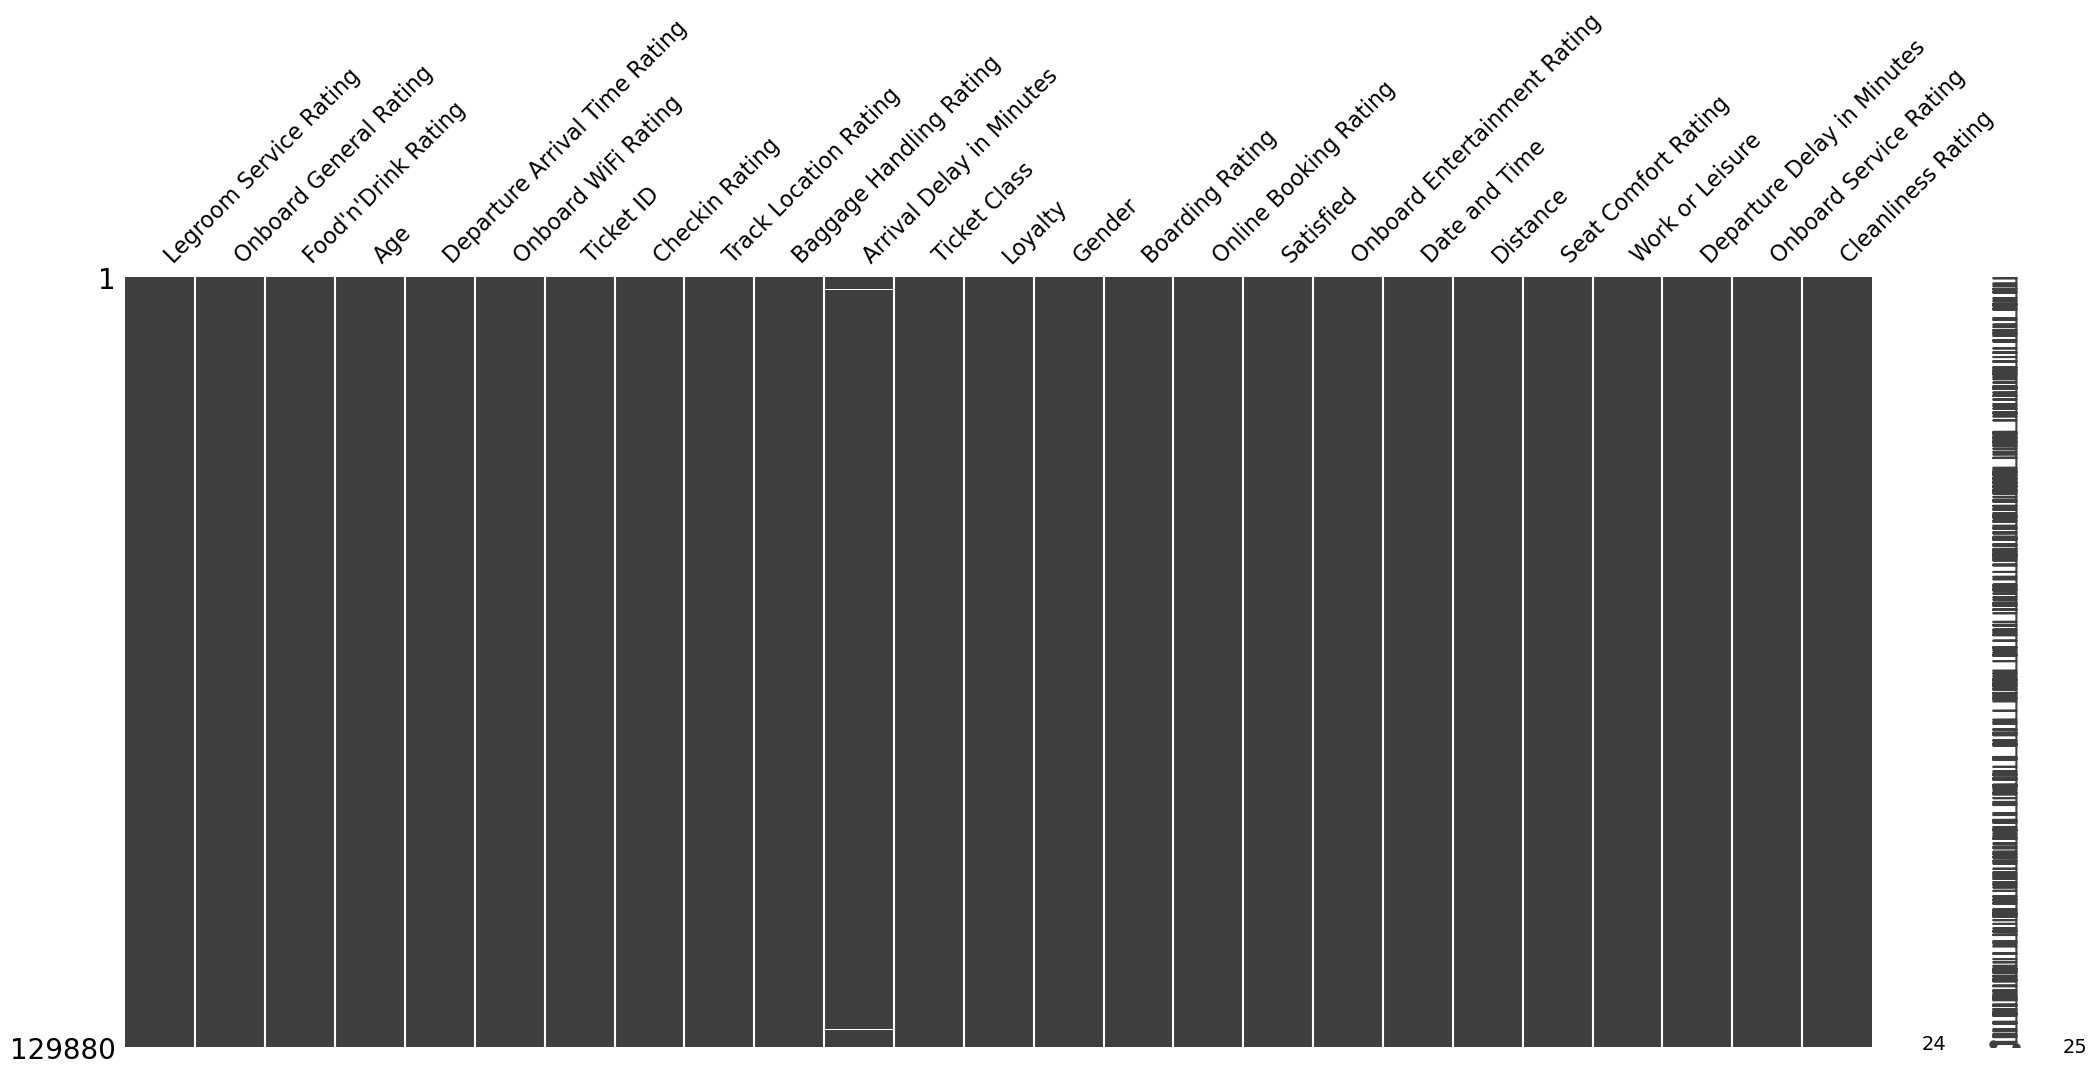

In [8]:
# matrix plot
msno.matrix(trains_df)

The matrix shows us that the magnitude of the missing values of the 'Arrival Delay in Minutes' is negligible since there are only 396 missing values out of 129880. In order to highlight this consideration we proceed to further compute the percentage of the missing values. 

In [17]:
# Creating a DataFrame for missing values count and percentage
missing_value_df = pd.DataFrame({
    'Missing Values': trains_df.isnull().sum(),
    'Percentage of Total (%)': (trains_df.isnull().sum() / len(trains_df)) * 100
})

# Filter out columns that don't have any missing values 
missing_value_df = missing_value_df[missing_value_df['Missing Values'] > 0]

missing_value_df



,Missing Values,Percentage of Total (%)
Arrival Delay in Minutes,393,0.302587


Taking into account our previous consideration, we decided to proceed by dropping the rows corresponding to the missing values of 'Arrival Delay in Minutes', because of the marginal importance of the missing values considering the whole dataset.

In [ ]:
#Drop rows with missing 'Arrival Delay in Minutes' values
dropped_delay_rows = trains_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(trains_df) - len(dropped_delay_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 393


## Step 3: Visualize distributions

In [ ]:
# non si capisce che è?? mattia exlplain

# Date and Time conversion: Convert 'Date and Time' to datetime
trains_df['Date and Time'] = pd.to_datetime(trains_df['Date and Time'])

# Extracting new features from 'Date and Time'
trains_df['Weekday'] = trains_df['Date and Time'].dt.day_name()
trains_df['Month'] = trains_df['Date and Time'].dt.month_name()
trains_df['Hour'] = trains_df['Date and Time'].dt.hour

# Summarize the distribution of categorical variables
categorical_summary = trains_df[['Satisfied', 'Work or Leisure', 'Ticket Class', 'Loyalty', 'Weekday', 'Month']].apply(pd.Series.value_counts)

# Analyzing the numerical data distribution with histograms
# Selecting numerical columns (excluding the 'Ticket ID' as it's a unique identifier)
numerical_columns = trains_df.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('Ticket ID')

# Correlation analysis
correlation_matrix = trains_df[numerical_columns].corr()

categorical_summary, correlation_matrix


(           Satisfied  Work or Leisure  Ticket Class   Loyalty  Weekday  \
 Disloyal         NaN              NaN           NaN   23780.0      NaN   
 Economy          NaN              NaN       58309.0       NaN      NaN   
 February         NaN              NaN           NaN       NaN      NaN   
 Friday           NaN              NaN           NaN       NaN  16301.0   
 Loyal            NaN              NaN           NaN  106100.0      NaN   
 March            NaN              NaN           NaN       NaN      NaN   
 Monday           NaN              NaN           NaN       NaN  24573.0   
 N            73452.0              NaN           NaN       NaN      NaN   
 Premium          NaN              NaN       62160.0       NaN      NaN   
 Saturday         NaN              NaN           NaN       NaN  16642.0   
 Smart            NaN              NaN        9411.0       NaN      NaN   
 Sunday           NaN              NaN           NaN       NaN  16593.0   
 Thursday         NaN    

[]

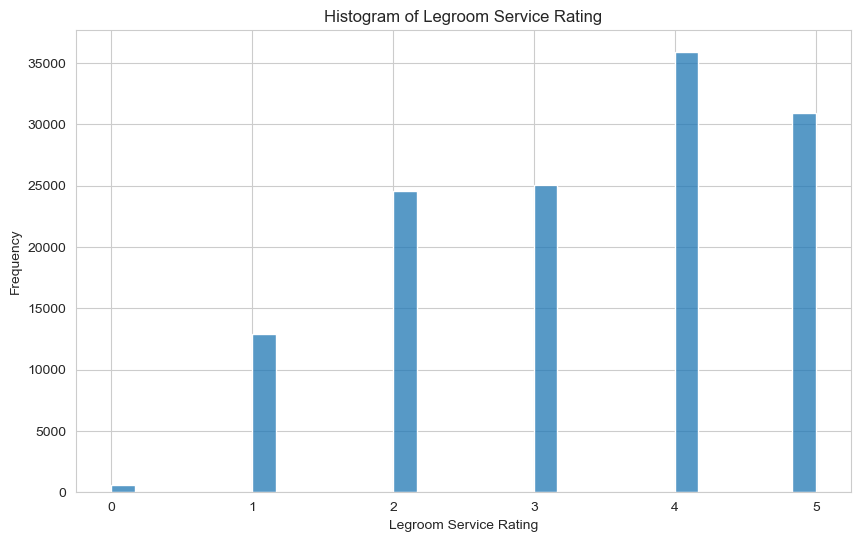

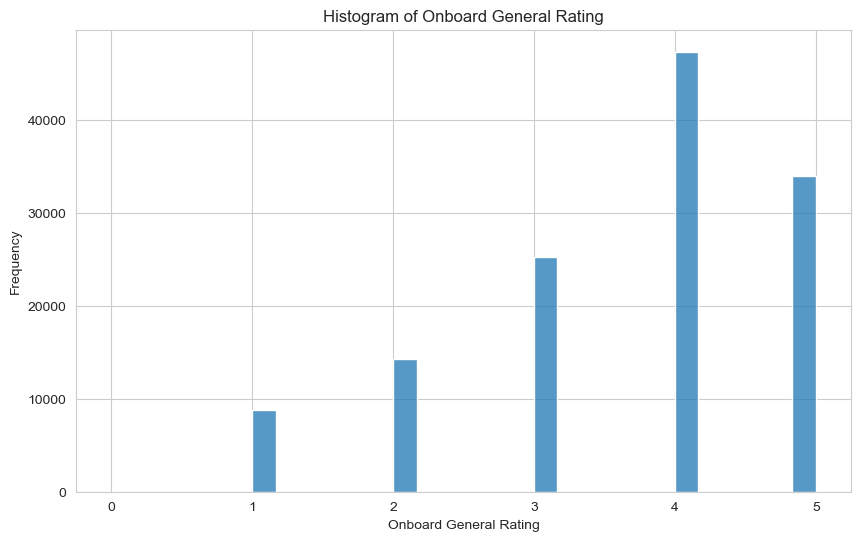

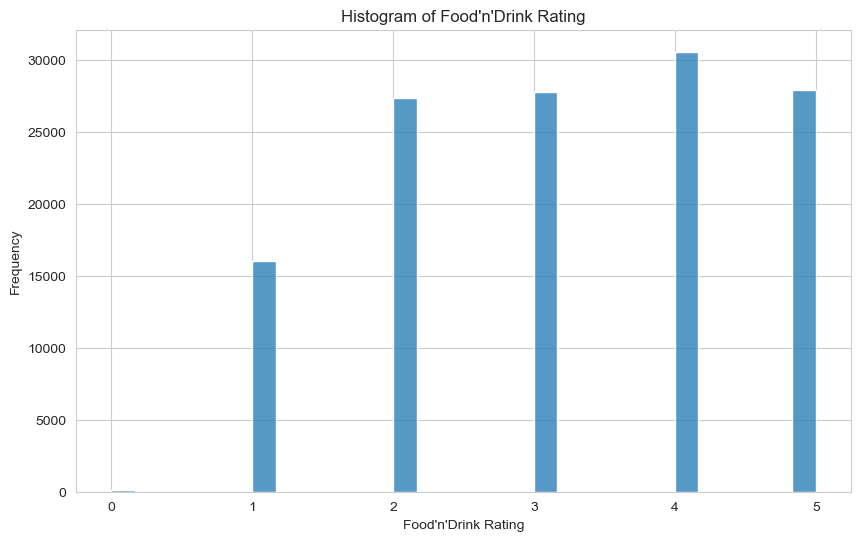

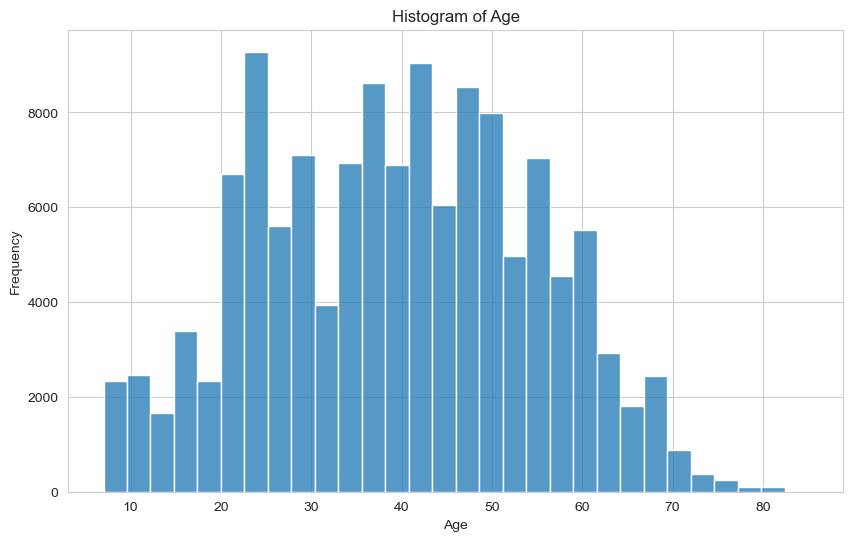

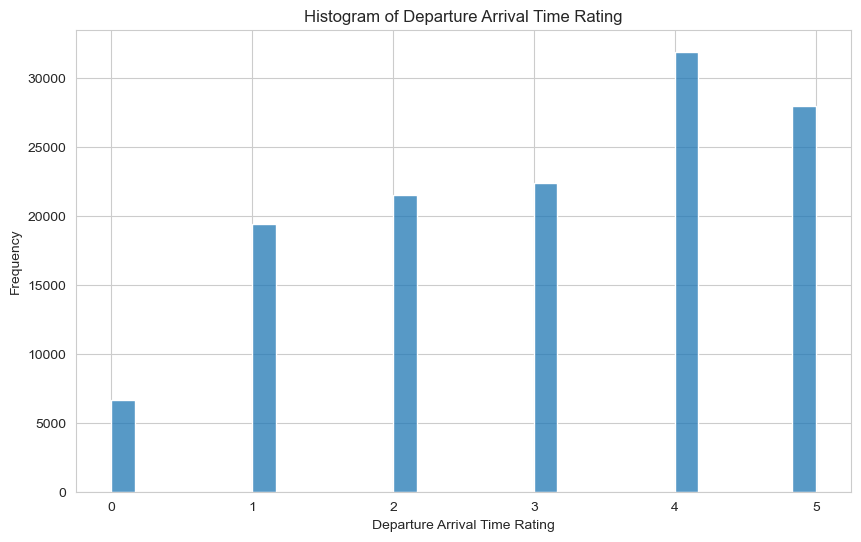

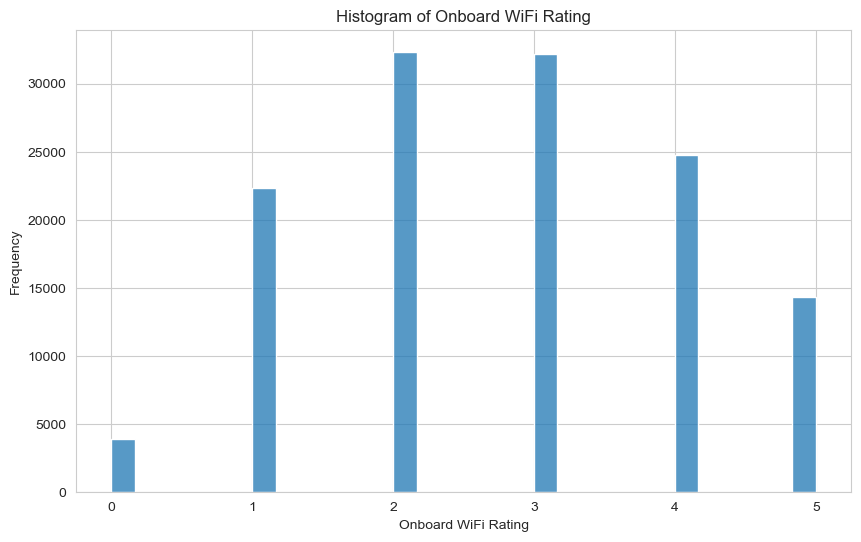

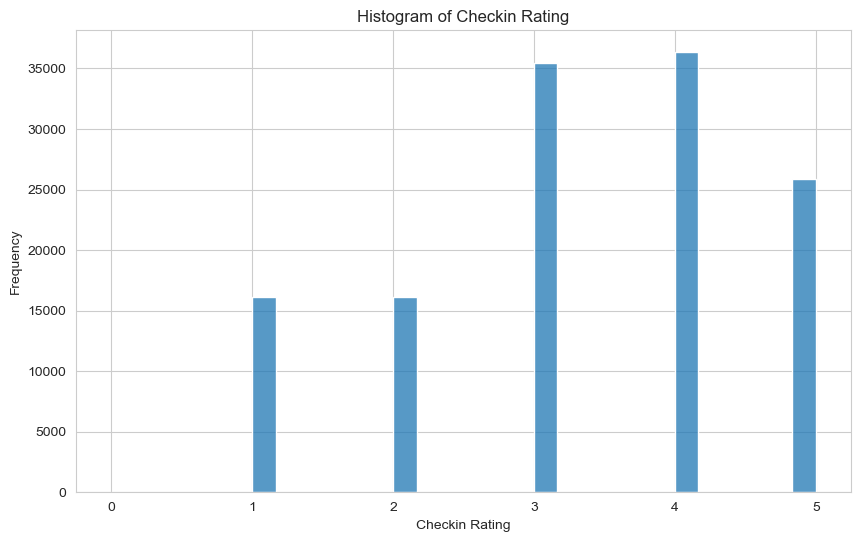

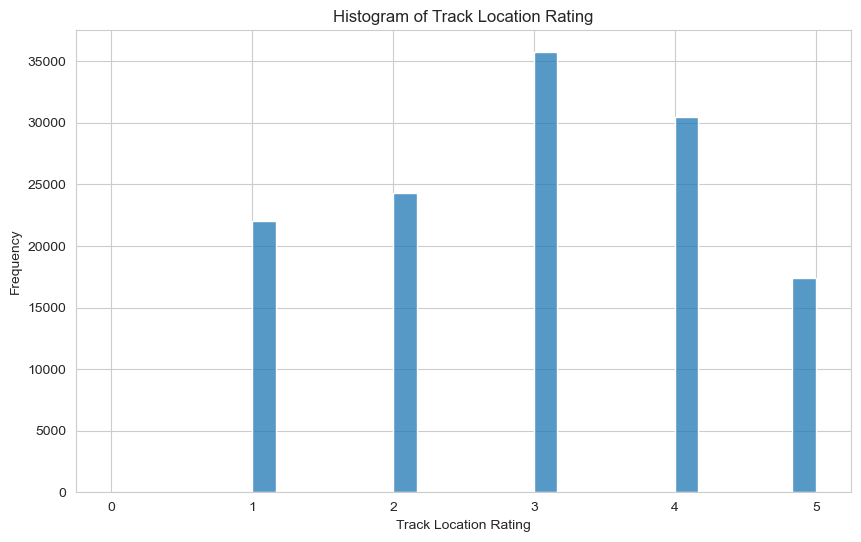

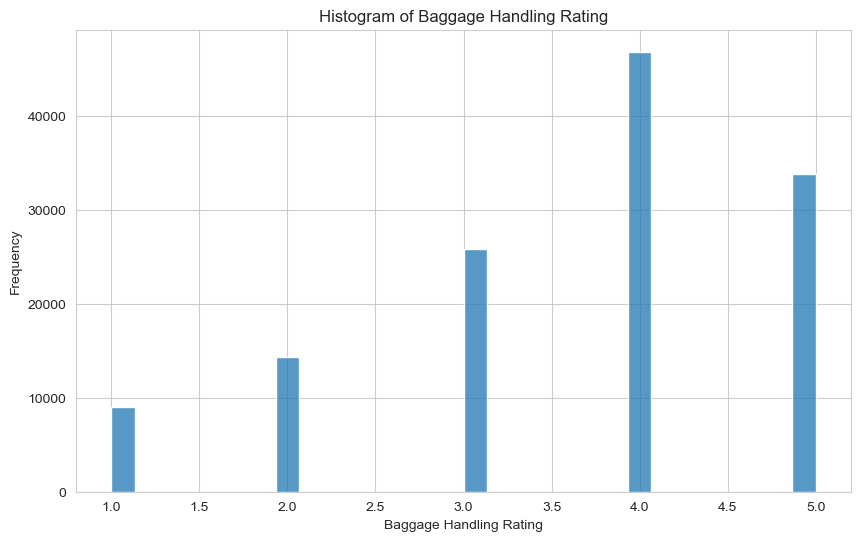

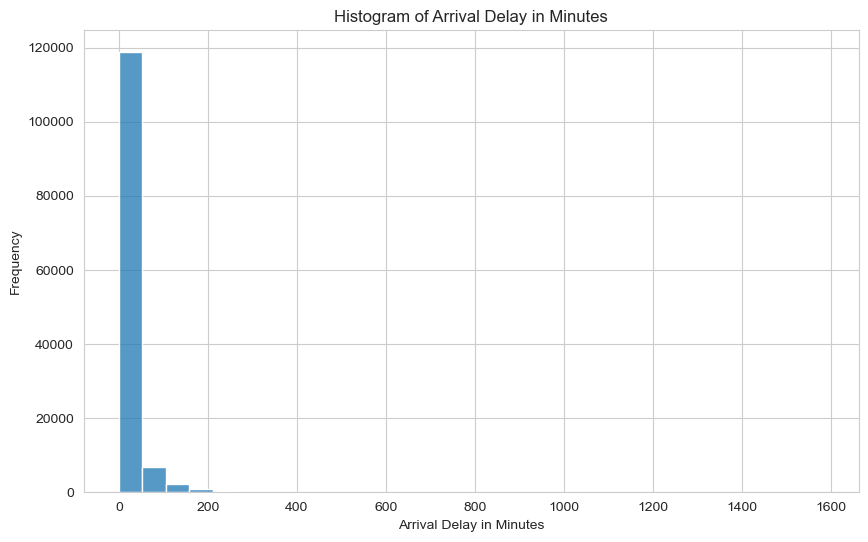

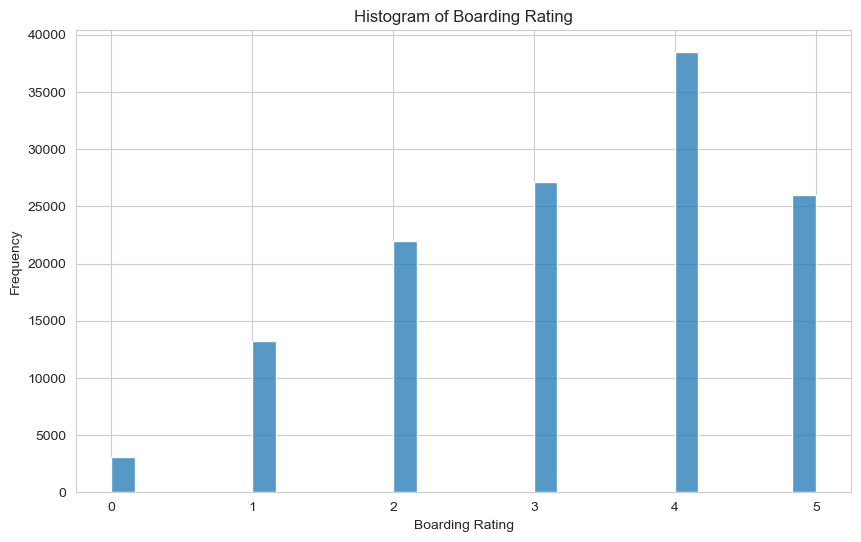

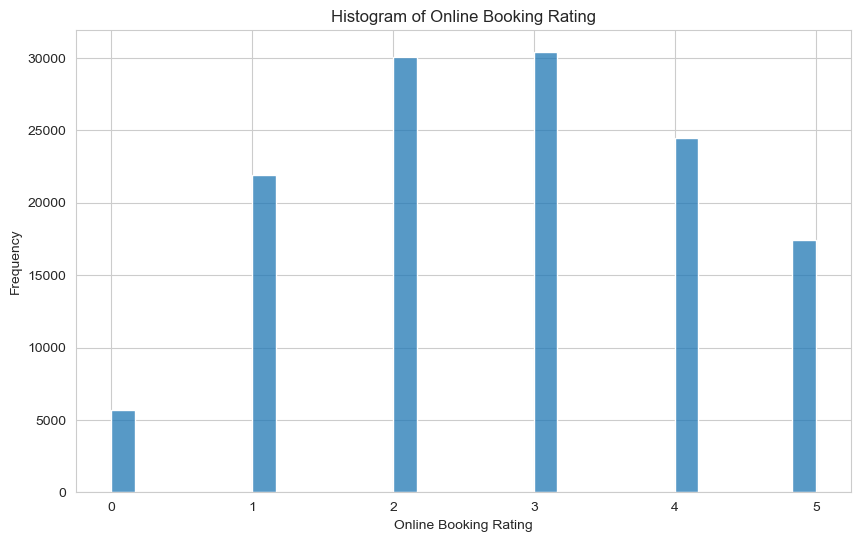

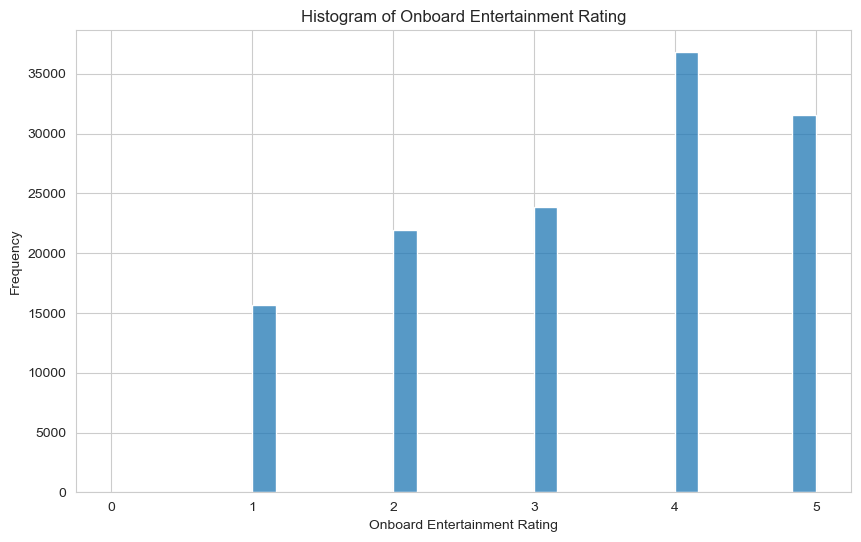

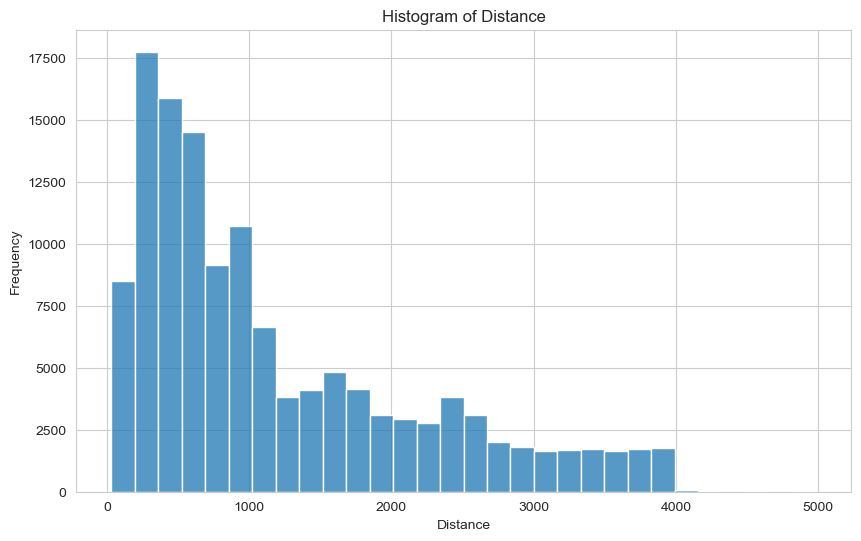

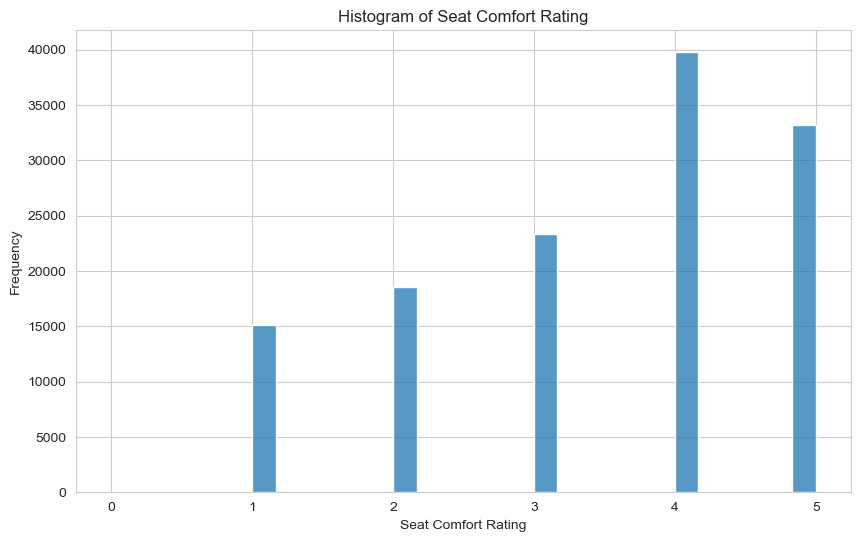

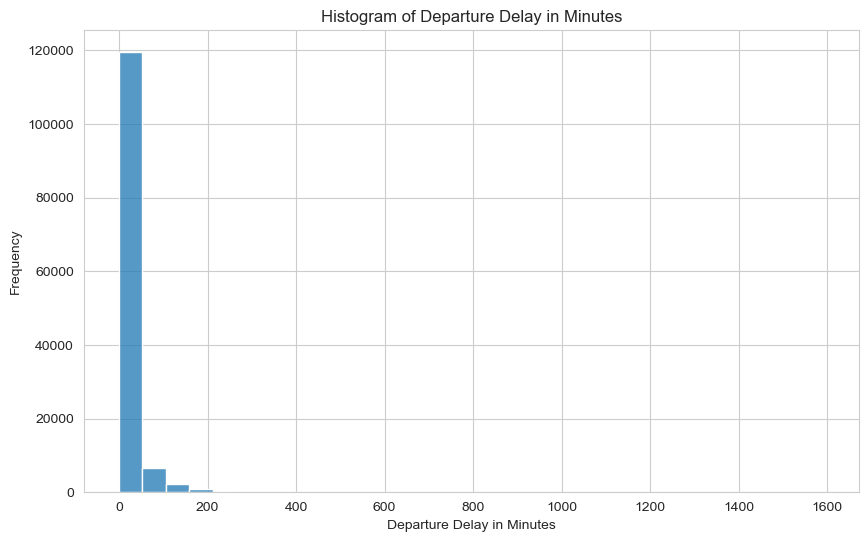

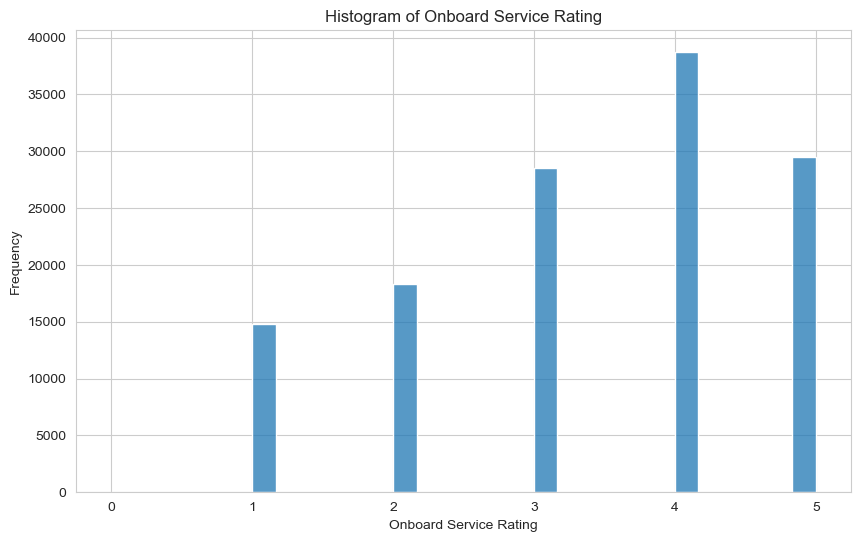

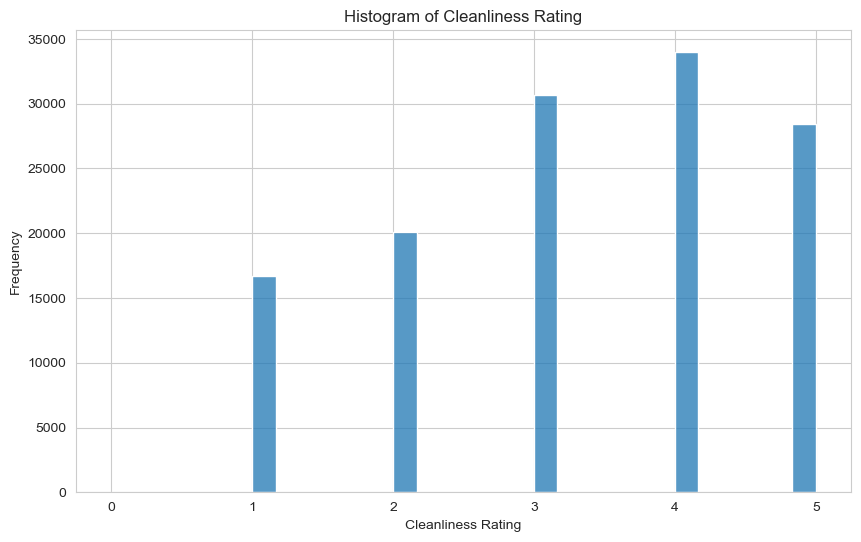

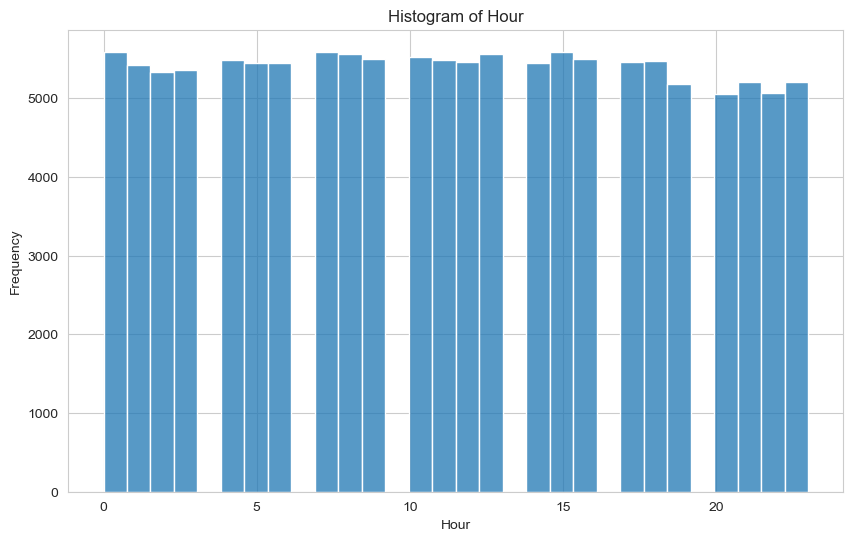

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Generate and save histograms for numerical variables
histogram_paths = []
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(trains_df[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
# Return the paths to the saved histogram images
histogram_paths


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

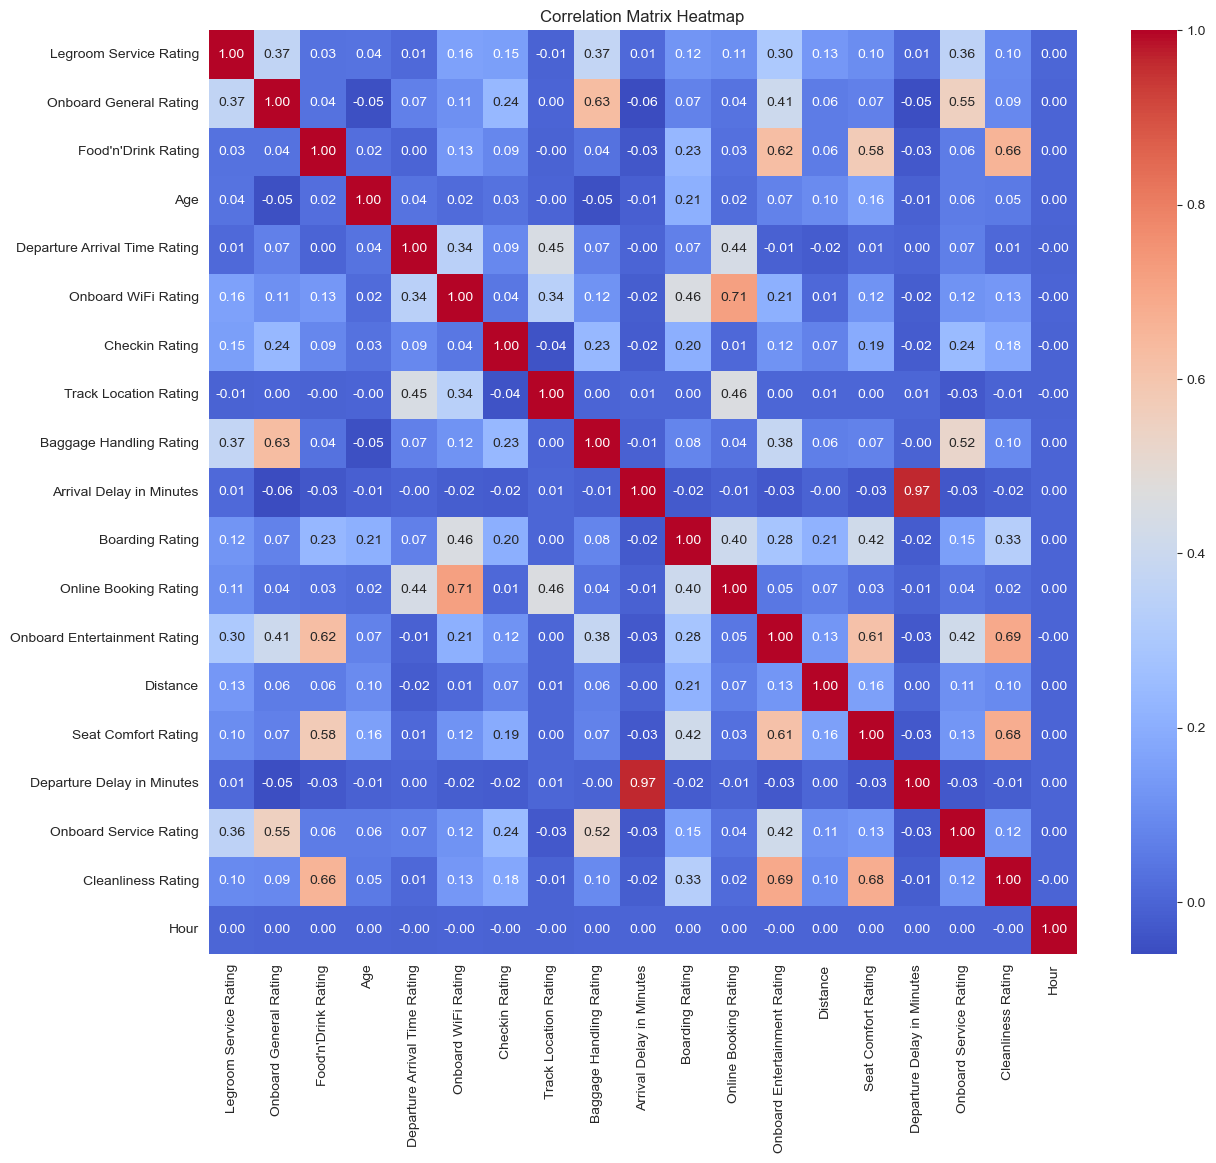

In [ ]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")